In [1]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [2]:
test_data = pd.read_csv('cereal_activity.csv', encoding='Latin-1') 
test_data.head()

,Unnamed: 0,calories,carbo,sugars
0,0,70,5.0,6
1,1,120,8.0,8
2,2,70,7.0,5
3,3,50,8.0,0
4,4,110,14.0,8


In [3]:
test_data = test_data.drop("Unnamed: 0", axis = 1)

In [4]:
test_data

,calories,carbo,sugars
0,70,5.0,6
1,120,8.0,8
2,70,7.0,5
3,50,8.0,0
4,110,14.0,8
...,...,...,...
72,110,21.0,3
73,110,13.0,12
74,100,17.0,3
75,100,17.0,3


In [5]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(test_data)

In [6]:
# Normalization of Data

normalized = normalize(data_scaled)

normalized = pd.DataFrame(normalized)


normalized.columns = test_data.columns

normalized.head()

,calories,carbo,sugars
0,0.339409,0.466688,0.816703
1,0.685416,0.403906,0.605859
2,0.340700,0.624616,0.702693
3,0.000000,0.986394,0.164399
4,0.544217,0.623582,0.561224


In [7]:
# OPTICS Algorithm

optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)

optics_model.fit(normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

In [8]:
#DBScan Algorithm (Eps = 0.5)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)

In [9]:
#DBScan Algorithm (Eps = 2)

labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 2)

In [10]:
space = np.arange(len(normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

print(labels)

[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1  1  1  1  2  2  2  2  2  2  2 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]


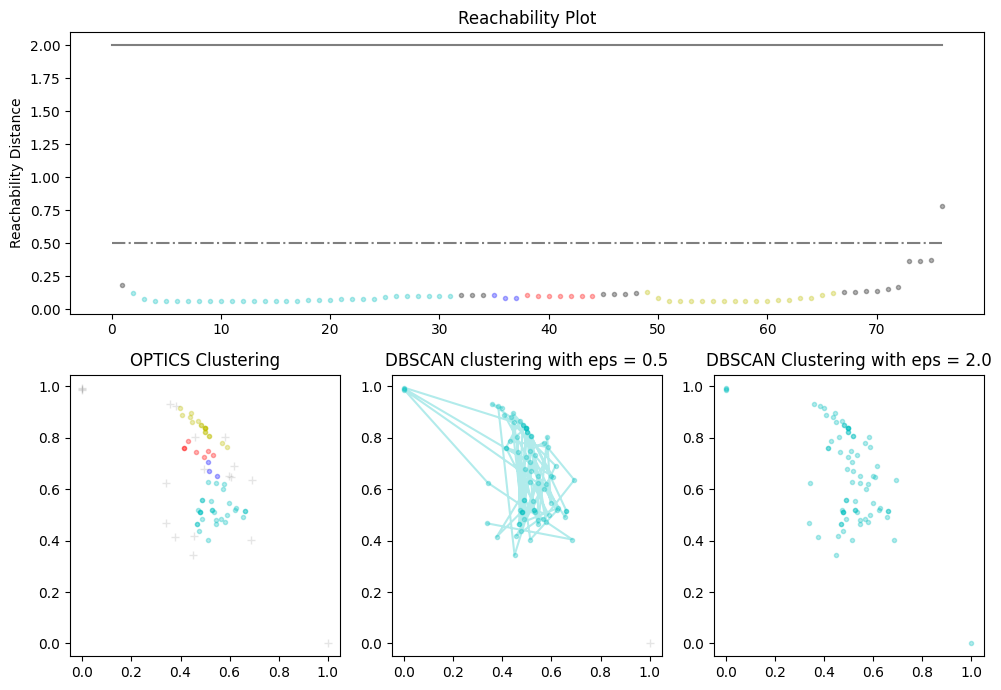

In [11]:
# Data Visualization

plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = normalized[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
	
ax2.plot(normalized.iloc[optics_model.labels_ == -1, 0],
		normalized.iloc[optics_model.labels_ == -1, 1],
	'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')


colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = normalized[labels1 == Class]
	ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
	
ax3.plot(normalized.iloc[labels1 == -1, 0],
		normalized.iloc[labels1 == -1, 1],
	'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')


colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
	Xk = normalized.iloc[labels2 == Class]
	ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
		
ax4.plot(normalized.iloc[labels2 == -1, 0],
		normalized.iloc[labels2 == -1, 1],
	'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()